In [28]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = car_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [29]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_nominal_features(data_1)
data_3 = data_processor.encode_ordinal_features(data_2)
data_4 = data_processor.standardize_data(data_3,data_3,features=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [30]:
data_4

,buying,maint,doors,persons,lug_boot,safety,Class_acc,Class_good,Class_unacc,Class_vgood
0,-1.341253,-1.341253,-1.341253,-1.22439,-1.22439,-1.22439,0,0,1,0
1,-1.341253,-1.341253,-1.341253,-1.22439,-1.22439,0.00000,0,0,1,0
2,-1.341253,-1.341253,-1.341253,-1.22439,-1.22439,1.22439,0,0,1,0
3,-1.341253,-1.341253,-1.341253,-1.22439,0.00000,-1.22439,0,0,1,0
4,-1.341253,-1.341253,-1.341253,-1.22439,0.00000,0.00000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1723,1.341253,1.341253,1.341253,1.22439,0.00000,0.00000,0,1,0,0
1724,1.341253,1.341253,1.341253,1.22439,0.00000,1.22439,0,0,0,1
1725,1.341253,1.341253,1.341253,1.22439,1.22439,-1.22439,0,0,1,0
1726,1.341253,1.341253,1.341253,1.22439,1.22439,0.00000,0,1,0,0


In [31]:
data_train, data_val = cross_validator.random_partition(data_4, random_state=42)

In [32]:
data = data_train.to_numpy()
X_train = data[:,:-4]
y_train = data[:,-4:]

In [33]:
data_test = data_val.to_numpy()
X_val = data_test[:,:-4]
y_val = data_test[:,-4:]

In [34]:
X_train.shape

(1382, 6)

In [35]:
autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=4)

autoE.train(X_train, max_epochs=20000, lr=0.0001)

Epoch 0/20000, Loss: 0.9944595887962994
Epoch 1/20000, Loss: 0.9944180824418206
Epoch 2/20000, Loss: 0.9943950192284746
Epoch 3/20000, Loss: 0.9943815052158363
Epoch 4/20000, Loss: 0.9943729067620328
Epoch 5/20000, Loss: 0.9943668071957416
Epoch 6/20000, Loss: 0.994361943434831
Epoch 7/20000, Loss: 0.9943576525606769
Epoch 8/20000, Loss: 0.9943535837792139
Epoch 9/20000, Loss: 0.9943495484949284
Epoch 10/20000, Loss: 0.9943454422622319
Epoch 11/20000, Loss: 0.9943412041433637
Epoch 12/20000, Loss: 0.9943367955329937
Epoch 13/20000, Loss: 0.9943321891129193
Epoch 14/20000, Loss: 0.9943273630776424
Epoch 15/20000, Loss: 0.9943222981018123
Epoch 16/20000, Loss: 0.9943169757332326
Epoch 17/20000, Loss: 0.9943113775262714
Epoch 18/20000, Loss: 0.9943054845589681
Epoch 19/20000, Loss: 0.99429927714808
Epoch 20/20000, Loss: 0.9942927346652587
Epoch 21/20000, Loss: 0.9942858354038354
Epoch 22/20000, Loss: 0.9942785564697838
Epoch 23/20000, Loss: 0.9942708736829466
Epoch 24/20000, Loss: 0.99426

Epoch 511/20000, Loss: 0.3566005749352306
Epoch 512/20000, Loss: 0.3565431592110335
Epoch 513/20000, Loss: 0.3564859236284149
Epoch 514/20000, Loss: 0.3564288673658974
Epoch 515/20000, Loss: 0.35637198961598826
Epoch 516/20000, Loss: 0.35631528958461556
Epoch 517/20000, Loss: 0.35625876649058796
Epoch 518/20000, Loss: 0.35620241956507487
Epoch 519/20000, Loss: 0.3561462480511072
Epoch 520/20000, Loss: 0.35609025120309945
Epoch 521/20000, Loss: 0.35603442828638937
Epoch 522/20000, Loss: 0.35597877857679733
Epoch 523/20000, Loss: 0.3559233013602032
Epoch 524/20000, Loss: 0.35586799593214025
Epoch 525/20000, Loss: 0.3558128615974058
Epoch 526/20000, Loss: 0.3557578976696882
Epoch 527/20000, Loss: 0.35570310347120826
Epoch 528/20000, Loss: 0.3556484783323767
Epoch 529/20000, Loss: 0.3555940215914648
Epoch 530/20000, Loss: 0.3555397325942893
Epoch 531/20000, Loss: 0.3554856106939105
Epoch 532/20000, Loss: 0.3554316552503428
Epoch 533/20000, Loss: 0.35537786563027857
Epoch 534/20000, Loss: 0

In [36]:
combined = CombinedModel(autoE,n_hidden_2=20,n_output=y_val.shape[1])

loss, val_metrics, final_loss = combined.train(X_train,y_train,X_val,y_val,epochs=15000,lr=0.0001)

Epoch 0/15000, Train Loss: 1.3455706145277189, Val Loss: 1.3474688170465052
Epoch 100/15000, Train Loss: 0.8358144066544901, Val Loss: 0.8750600462883396
Epoch 200/15000, Train Loss: 0.8289406752138104, Val Loss: 0.8684992106973118
Epoch 300/15000, Train Loss: 0.8275611771977976, Val Loss: 0.867560838321879
Epoch 400/15000, Train Loss: 0.8240440098132451, Val Loss: 0.864267496058107
Epoch 500/15000, Train Loss: 0.8000064422957212, Val Loss: 0.8397139429882121
Epoch 600/15000, Train Loss: 0.6038395993071356, Val Loss: 0.6411580831221332
Epoch 700/15000, Train Loss: 0.5122483289464821, Val Loss: 0.5456268372497348
Epoch 800/15000, Train Loss: 0.4918928032009836, Val Loss: 0.5202466358383694
Epoch 900/15000, Train Loss: 0.4754421718957858, Val Loss: 0.4999302548036236
Epoch 1000/15000, Train Loss: 0.4573940721570032, Val Loss: 0.4784554422107202
Epoch 1100/15000, Train Loss: 0.4366570787085386, Val Loss: 0.4544463933159626
Epoch 1200/15000, Train Loss: 0.41289319459519624, Val Loss: 0.427

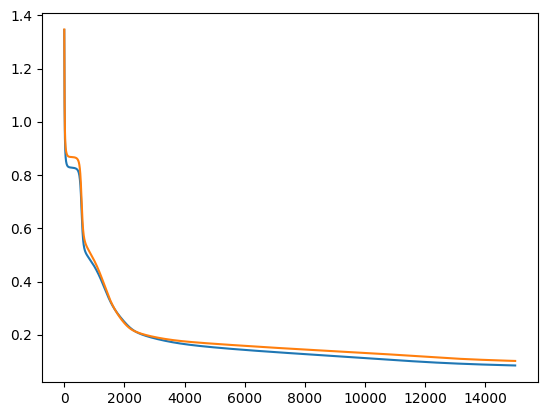

In [37]:
import matplotlib.pyplot as plt

plt.plot(loss)
plt.plot(val_metrics)

In [38]:
ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=20,n_hidden_2=20,n_output=y_train.shape[1])

loss, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,10000,0.0001)

Epoch 0/10000, Train Loss: 1.3458067933510955, Val Loss: 1.3476974457477864
Epoch 100/10000, Train Loss: 0.837086020706496, Val Loss: 0.8762529219730306
Epoch 200/10000, Train Loss: 0.8284487759716663, Val Loss: 0.8679327823855624
Epoch 300/10000, Train Loss: 0.8221351516511948, Val Loss: 0.8618082195843896
Epoch 400/10000, Train Loss: 0.5304145608867049, Val Loss: 0.5635707278766301
Epoch 500/10000, Train Loss: 0.49511618918103684, Val Loss: 0.517703817617728
Epoch 600/10000, Train Loss: 0.48302550638144104, Val Loss: 0.4990279972825324
Epoch 700/10000, Train Loss: 0.4747626363111055, Val Loss: 0.48521071516565834
Epoch 800/10000, Train Loss: 0.46928266635909455, Val Loss: 0.47527904819147704
Epoch 900/10000, Train Loss: 0.46565317341847773, Val Loss: 0.4682582261362202
Epoch 1000/10000, Train Loss: 0.46313841880902873, Val Loss: 0.46325217926458523
Epoch 1100/10000, Train Loss: 0.46122160917585747, Val Loss: 0.4595471129435496
Epoch 1200/10000, Train Loss: 0.4594944979402648, Val Los

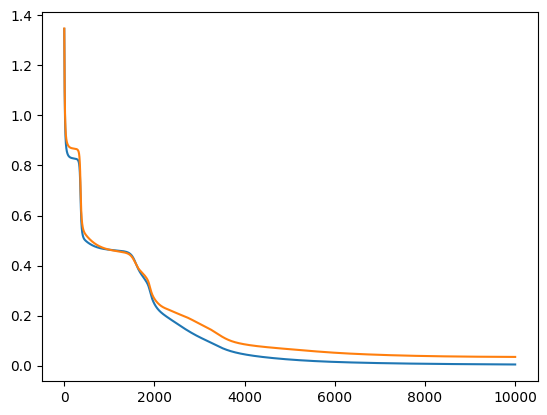

In [39]:
plt.plot(loss)
plt.plot(val_metrics)

In [40]:
linear = LinearNetwork(config)

losses, val_losses = linear.logistic_regression(X_train,y_train,X_val,y_val,epochs=10000,lr=0.00001)

Epoch 0/10000, Training Loss: 1.384605313831399, Validation Loss: 1.3785864645903683
Epoch 100/10000, Training Loss: 0.9596241165824387, Validation Loss: 0.9723779531455712
Epoch 200/10000, Training Loss: 0.774843687073881, Validation Loss: 0.799055099237077
Epoch 300/10000, Training Loss: 0.6851602751566842, Validation Loss: 0.7163759204233524
Epoch 400/10000, Training Loss: 0.6346183023434921, Validation Loss: 0.6704860853815028
Epoch 500/10000, Training Loss: 0.6026577057279765, Validation Loss: 0.6418302498556805
Epoch 600/10000, Training Loss: 0.580640768076148, Validation Loss: 0.6222674874875924
Epoch 700/10000, Training Loss: 0.564459053367899, Validation Loss: 0.6079608562856517
Epoch 800/10000, Training Loss: 0.5519593491012299, Validation Loss: 0.5969196376082753
Epoch 900/10000, Training Loss: 0.5419238622919976, Validation Loss: 0.5880305980275456
Epoch 1000/10000, Training Loss: 0.5336199323565416, Validation Loss: 0.5806322556522593
Epoch 1100/10000, Training Loss: 0.526

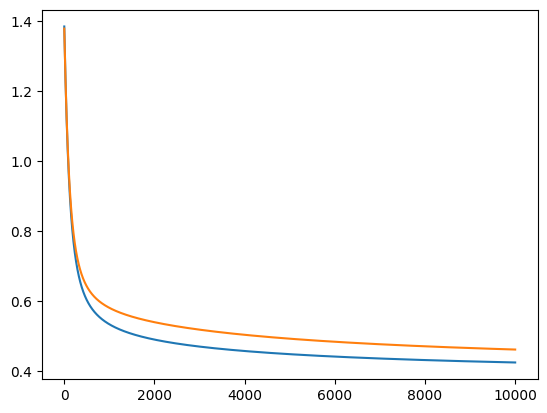

In [41]:
plt.plot(losses)
plt.plot(val_losses)